# Unit 5 - Financial Planning


In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
BTC=1.2
ETH=5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
RequestDataBtc = requests.get(btc_url)
RequestDataBtc
RequestBtcContent = RequestDataBtc.content 
RequestBtcContent
DataBtc = RequestDataBtc.json()
import json
print(json.dumps(DataBtc, indent=4))
RequestDataEth = requests.get(eth_url)
RequestEthContent = RequestDataEth.content
DataEth = RequestDataEth.json()
import json
print(json.dumps(DataEth, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18722450,
            "total_supply": 18722450,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 34570.0,
                    "volume_24h": 29372282030,
                    "market_cap": 647244453642,
                    "percentage_change_1h": -0.350014069838186,
                    "percentage_change_24h": -0.203128077258979,
                    "percentage_change_7d": -1.16368435862814,
                    "percent_change_1h": -0.350014069838186,
                    "percent_change_24h": -0.203128077258979,
                    "percent_change_7d": -1.16368435862814
                },
                "CAD": {
                    "price": 41739.818,
                    "volume_24h": 35464093323.022,
                 

In [7]:
# Compute current value of my crypto
# Fetch current BTC price
BtcValue = DataBtc['data']['1']['quotes']['USD']['price']
WalletBtcValue = BTC * BtcValue
# Fetch current ETH price
EthValue = DataEth['data']['1027']['quotes']['USD']['price']
WalletEthValue = ETH * EthValue

# Print current crypto wallet balance
print(f"The current value of your {BTC} BTC is ${WalletBtcValue:0.2f}")
print(f"The current value of your {ETH} ETH is ${WalletEthValue:0.2f}")

The current value of your 1.2 BTC is $41484.00
The current value of your 5.3 ETH is $12186.98


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Current amount of shares
WalletAgg = 200
WalletSpy = 50

In [9]:
# Set Alpaca API key and secret
AlpacaApiKey = os.getenv("ALPACA_API_KEY")
AlpacaSecretKey = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(AlpacaApiKey, AlpacaSecretKey, api_version = 'v2')

In [10]:
# Format current date as ISO format
today = pd.Timestamp('2021-04-29', tz='America/New_York').isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"
# Get current closing prices for SPY and AGG
portfolio_df = api.get_barset(tickers, timeframe, start=today, end=today,).df
portfolio_df.index = portfolio_df.index.date
# Preview DataFrame
portfolio_df.head()

AGG                                      SPY                  \
              open    high     low   close   volume    open    high     low   
2021-04-29  114.14  114.37  114.09  114.37  5796983  420.33  420.72  416.44   

                              
             close    volume  
2021-04-29  419.98  70595229

In [11]:
# Pick AGG and SPY close prices
agg_close_price = float(portfolio_df['AGG']['close'])
spy_close_price = float(portfolio_df['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.37
Current SPY closing price: $419.98


In [12]:
# Compute the current value of shares
agg_value = WalletAgg * agg_close_price
spy_value = WalletSpy * spy_close_price

# Print current value of share
print(f"The current value of your {WalletSpy} SPY shares is ${spy_value:0.2f}")
print(f"The current value of your {WalletAgg} AGG shares is ${agg_value:0.2f}")

The current value of your 50 SPY shares is $20999.00
The current value of your 200 AGG shares is $22874.00


### Savings Health Analysis

In [14]:
# Set monthly household income
monthly_income = 12000
total_crypto = WalletBtcValue + WalletEthValue
total_shares_value = agg_value +spy_value
data = {'amount':[total_crypto, total_shares_value]}
#Creates savings Dataframe
df_savings = pd.DataFrame(data, index =['crypto', 'shares'])
#Display Dataframe
df_savings 

amount
crypto  53670.979
shares  43873.000

<AxesSubplot:title={'center':'Compostion of Personal Savings'}, ylabel='amount'>

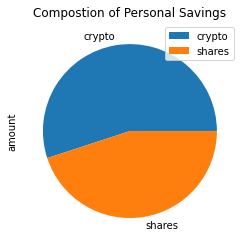

In [15]:
# Plot savings pie chart
df_savings.plot.pie(y ="amount", title = "Compostion of Personal Savings")

In [21]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares_value

# Validate saving health
if emergency_fund < total_savings:
    print("Great! you have sufficient money in your emergency fund.")
elif emergency_fund == total_savings:
    print("Great! You have reached your financial goal.")
else:
    print(f"You are {emergency_fund - total_savings}dollars away!")

Great! you have sufficient money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [22]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [25]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ['AGG','SPY']
df_stock_data = api.get_barset(tickers, timeframe, start=start_date, end=end_date).df
# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2020-03-18 00:00:00-04:00  109.36  110.5700  105.7707  106.33  30117292   
2020-03-19 00:00:00-04:00  106.47  109.2200  105.5600  108.97  21031320   
2020-03-20 00:00:00-04:00  108.46  110.2399  108.4600  109.49  28449412   
2020-03-23 00:00:00-04:00  109.90  112.9400  109.0000  112.55  23873510   
2020-03-24 00:00:00-04:00  111.52  113.5000  111.0754  113.29  18141498   

                              SPY                                       
                             open      high     low   close     volume  
time                                                                    
2020-03-18 00:00:00-04:00  236.25  248.3700  228.02  241.01  298252778  
2020-03-19 00:00:00-04:00  239.25  247.3800  232.22  241.16  261233795  
2020-03-20 00:00:00-04:00  242.53  244.4700  228.50  228.94  302880969  
2020-03-23 00:00:00-04:00  228.19  229.6833  218.26  222.51  280560712  
2020-03-24 00:00:00-04:00  234.42  244.1000  233.80  243.59  211595249

In [31]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_cumulative_returns = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*30)

In [32]:
# Printing the simulation input data
MC_cumulative_returns.portfolio_data.head()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2020-03-18 00:00:00-04:00  109.36  110.5700  105.7707  106.33  30117292   
2020-03-19 00:00:00-04:00  106.47  109.2200  105.5600  108.97  21031320   
2020-03-20 00:00:00-04:00  108.46  110.2399  108.4600  109.49  28449412   
2020-03-23 00:00:00-04:00  109.90  112.9400  109.0000  112.55  23873510   
2020-03-24 00:00:00-04:00  111.52  113.5000  111.0754  113.29  18141498   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2020-03-18 00:00:00-04:00          NaN  236.25  248.3700  228.02  241.01   
2020-03-19 00:00:00-04:00     0.024828  239.25  247.3800  232.22  241.16   
2020-03-20 00:00:00-04:00     0.004772  242.53  244.4700  228.50  228.94   
2020-03-23 00:00:00-04:00     0.027948  228.19  229.6833  218.26  222.51   
2020-03-24 00:00:00-04:00     0.006575  234.42  244.1000  233.80  243.59   

                                                   
                              volume daily_return  
time                                               
2020-03-18 00:00:00-04:00  298252778          NaN  
2020-03-19 00:00:00-04:00  261233795     0.000622  
2020-03-20 00:00:00-04:00  302880969    -0.050672  
2020-03-23 00:00:00-04:00  280560712    -0.028086  
2020-03-24 00:00:00-04:00  211595249     0.094737

In [33]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_cumulative_returns.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0             1             2             3             4    \
0     1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
1     1.021492e+00  9.787104e-01  9.911787e-01  1.007878e+00  9.899604e-01   
2     1.015985e+00  9.927968e-01  9.908094e-01  9.907991e-01  1.002437e+00   
3     1.024784e+00  9.834516e-01  9.993230e-01  9.618273e-01  9.780110e-01   
4     1.022245e+00  1.013493e+00  1.009543e+00  9.612300e-01  9.797435e-01   
...            ...           ...           ...           ...           ...   
7556  7.083538e+08  8.079696e+07  1.610532e+08  6.200583e+07  2.397494e+07   
7557  7.144096e+08  7.994625e+07  1.611185e+08  6.114098e+07  2.368127e+07   
7558  7.145723e+08  8.066207e+07  1.600010e+08  6.029403e+07  2.365310e+07   
7559  7.225956e+08  8.260896e+07  1.623821e+08  6.104831e+07  2.419669e+07   
7560  7.342160e+08  8.507399e+07  1.593467e+08  6.222779e+07  2.385808e+07   

               5             6             7             8             9    \
0     1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
1     1.017368e+00  9.874835e-01  1.030062e+00  9.966250e-01  1.025605e+00   
2     1.023063e+00  9.904981e-01  1.033042e+00  9.678404e-01  1.004187e+00   
3     1.015526e+00  9.907671e-01  1.017513e+00  9.677648e-01  1.019621e+00   
4     1.017093e+00  9.718779e-01  1.022608e+00  9.755681e-01  1.002837e+00   
...            ...           ...           ...           ...           ...   
7556  4.802376e+08  1.298696e+08  1.558358e+08  5.623624e+08  8.121572e+08   
7557  4.658479e+08  1.320388e+08  1.589652e+08  5.753704e+08  8.095360e+08   
7558  4.616646e+08  1.338936e+08  1.583915e+08  5.699332e+08  7.964136e+08   
7559  4.666032e+08  1.345848e+08  1.578819e+08  5.823550e+08  7.886932e+08   
7560  4.711763e+08  1.373284e+08  1.570896e+08  5.847549e+08  7.848641e+08   

      ...           490           491           492           493  \
0     ...  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
1     ...  9.974627e-01  9.915628e-01  1.011769e+00  9.779468e-01   
2     ...  1.017435e+00  9.701357e-01  1.004044e+00  9.766462e-01   
3     ...  1.010817e+00  9.597722e-01  1.017683e+00  9.497656e-01   
4     ...  1.025256e+00  9.525380e-01  1.028442e+00  9.539352e-01   
...   ...           ...           ...           ...           ...   
7556  ...  2.379661e+09  7.091339e+08  3.862502e+08  2.662395e+08   
7557  ...  2.342203e+09  7.119764e+08  3.810747e+08  2.697108e+08   
7558  ...  2.348398e+09  7.099772e+08  3.828997e+08  2.713538e+08   
7559  ...  2.371336e+09  7.207699e+08  3.865114e+08  2.707850e+08   
7560  ...  2.360187e+09  7.195960e+08  3.769046e+08  2.717061e+08   

               494           495           496           497           498  \
0     1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
1     1.005329e+00  1.003187e+00  9.928459e-01  9.851560e-01  9.918363e-01   
2     9.943739e-01  1.009187e+00  1.005532e+00  9.737660e-01  9.986530e-01   
3     9.929916e-01  9.998950e-01  1.011070e+00  9.581771e-01  9.963276e-01   
4     1.005795e+00  1.004091e+00  1.025213e+00  9.779962e-01  9.885347e-01   
...            ...           ...           ...           ...           ...   
7556  8.170173e+08  4.363250e+08  3.776050e+07  7.974633e+07  8.172334e+08   
7557  8.146675e+08  4.339098e+08  3.742504e+07  7.988429e+07  7.992108e+08   
7558  8.198131e+08  4.371387e+08  3.764768e+07  8.168196e+07  8.066927e+08   
7559  8.269203e+08  4.381951e+08  3.735358e+07  8.239392e+07  8.066619e+08   
7560  8.492836e+08  4.318804e+08  3.800020e+07  8.225834e+07  8.175626e+08   

               499  
0     1.000000e+00  
1     1.001803e+00  
2     1.007372e+00  
3     9.964117e-01  
4     9.857224e-01  
...            ...  
7556  1.515374e+09  
7557  1.540903e+09  
7558  1.542045e+09  
7559  1.542998e+09  
7560  1.527309e+09  

[7561 rows x 500 columns]

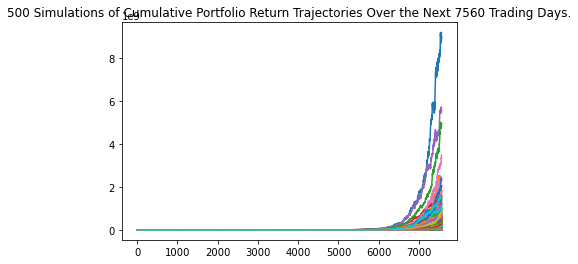

In [34]:
# Plot simulation outcomes
line_plot = MC_cumulative_returns.plot_simulation()

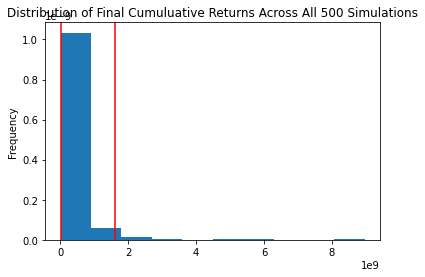

In [35]:
# Plot probability distribution and confidence intervals
dist_plot = MC_cumulative_returns.plot_distribution()

### Retirement Analysis

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = MC_cumulative_returns.summarize_cumulative_return()
# Print summary statistics
print(summary_stats)

count           5.000000e+02
mean            3.526124e+08
std             6.336777e+08
min             7.175756e+06
25%             8.443736e+07
50%             1.804250e+08
75%             3.973379e+08
max             8.966729e+09
95% CI Lower    1.989380e+07
95% CI Upper    1.612783e+09
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [39]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_stats[8]*20000,2)
ci_upper = round(summary_stats[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $397875982330.36 and $32255664968911.99


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [40]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_stats[8]*30000,2)
ci_upper = round(summary_stats[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $596813973495.54 and $48383497453367.98


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [41]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
five_year_cummulative_returns = MCSimulation(portfolio_data= df_stock_data, weights = [.40,.60], num_simulation=500, num_trading_days = 252*5)
five_year_cummulative_returns.portfolio_data.head()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2020-03-18 00:00:00-04:00  109.36  110.5700  105.7707  106.33  30117292   
2020-03-19 00:00:00-04:00  106.47  109.2200  105.5600  108.97  21031320   
2020-03-20 00:00:00-04:00  108.46  110.2399  108.4600  109.49  28449412   
2020-03-23 00:00:00-04:00  109.90  112.9400  109.0000  112.55  23873510   
2020-03-24 00:00:00-04:00  111.52  113.5000  111.0754  113.29  18141498   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2020-03-18 00:00:00-04:00          NaN  236.25  248.3700  228.02  241.01   
2020-03-19 00:00:00-04:00     0.024828  239.25  247.3800  232.22  241.16   
2020-03-20 00:00:00-04:00     0.004772  242.53  244.4700  228.50  228.94   
2020-03-23 00:00:00-04:00     0.027948  228.19  229.6833  218.26  222.51   
2020-03-24 00:00:00-04:00     0.006575  234.42  244.1000  233.80  243.59   

                                                   
                              volume daily_return  
time                                               
2020-03-18 00:00:00-04:00  298252778          NaN  
2020-03-19 00:00:00-04:00  261233795     0.000622  
2020-03-20 00:00:00-04:00  302880969    -0.050672  
2020-03-23 00:00:00-04:00  280560712    -0.028086  
2020-03-24 00:00:00-04:00  211595249     0.094737

In [42]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
five_year_cummulative_returns.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0          1          2          3          4          5    \
0      1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
1      1.009938   0.996723   0.997271   0.995892   0.998366   1.009406   
2      1.014391   0.999101   1.015749   1.000206   0.991245   0.984080   
3      1.018495   0.985674   1.010281   1.013657   0.985088   1.009517   
4      1.010379   0.986296   1.029380   1.025770   0.988214   1.020545   
...         ...        ...        ...        ...        ...        ...   
1256  36.254481  16.603557  60.490780  16.613872  28.435570  16.032233   
1257  36.452886  16.535698  61.315631  16.092891  28.569865  16.303797   
1258  35.884992  16.304358  61.829978  16.525667  27.888692  16.435030   
1259  35.559833  16.229134  61.592690  16.465129  27.793004  16.642368   
1260  35.427139  16.393662  61.304543  16.595229  27.373463  16.585480   

            6          7          8          9    ...        490        491  \
0      1.000000   1.000000   1.000000   1.000000  ...   1.000000   1.000000   
1      1.011099   1.004929   1.010893   1.001777  ...   0.994899   0.994363   
2      1.020253   1.007309   1.000760   1.011401  ...   0.984898   0.979617   
3      1.026550   0.980851   0.976187   0.992710  ...   0.964395   0.969509   
4      1.034434   0.974507   0.987182   0.976970  ...   0.971530   0.977824   
...         ...        ...        ...        ...  ...        ...        ...   
1256  28.979672  14.483755  16.059750  24.651661  ...  17.700731  17.302235   
1257  29.478581  14.314392  15.891226  24.668259  ...  17.629424  17.372219   
1258  29.242780  14.177430  15.995347  24.817123  ...  17.857889  17.424293   
1259  29.351144  14.316274  16.212938  24.797417  ...  17.804223  17.747616   
1260  28.705354  14.256185  16.176914  24.839222  ...  17.806708  17.330699   

            492        493        494        495        496        497  \
0      1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
1      1.013209   1.006650   1.003778   1.003050   1.011482   1.003485   
2      1.009742   1.003017   0.990634   1.013302   0.994521   0.982593   
3      1.020921   1.003007   0.976857   1.004489   0.999680   0.963570   
4      1.000321   0.996896   0.978098   0.994953   1.014310   0.965638   
...         ...        ...        ...        ...        ...        ...   
1256  27.708040  14.292983  20.183827  31.706790  17.066933  19.063604   
1257  27.693225  14.142027  20.255260  31.588851  17.052765  19.039923   
1258  28.461466  13.919206  20.645725  31.589952  16.936613  18.599370   
1259  28.456131  13.855380  20.993379  31.537013  16.705758  18.549678   
1260  28.404015  13.997788  21.464661  31.111494  16.935929  18.395354   

            498        499  
0      1.000000   1.000000  
1      0.998923   0.975970  
2      1.003950   0.990472  
3      1.001195   1.009411  
4      1.006611   0.990715  
...         ...        ...  
1256  13.897055  27.125299  
1257  13.899565  27.573699  
1258  14.121498  27.612744  
1259  14.027050  27.735501  
1260  14.043634  26.957851  

[1261 rows x 500 columns]

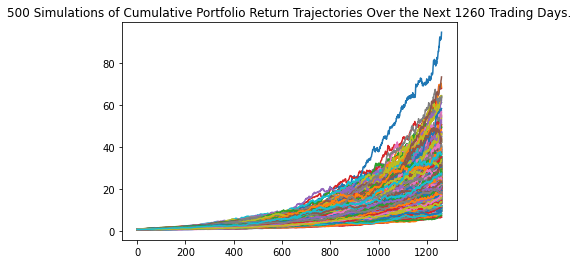

In [44]:
# Plot simulation outcomes
five_year_line_plot = five_year_cummulative_returns.plot_simulation()

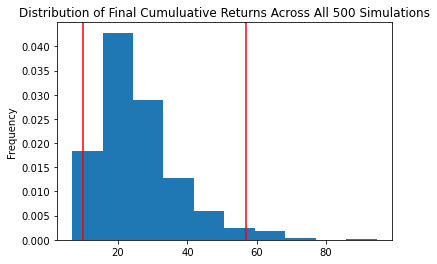

In [45]:
# Plot probability distribution and confidence intervals
dist_plot_five = five_year_cummulative_returns.plot_distribution()

In [46]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_summary_stats = five_year_cummulative_returns.summarize_cumulative_return()

# Print summary statistics
print(MC_summary_stats)

count           500.000000
mean             25.785095
std              11.992831
min               6.757926
25%              17.544840
50%              23.404659
75%              31.390655
max              94.528906
95% CI Lower      9.757440
95% CI Upper     56.819731
Name: 1260, dtype: float64


In [47]:
# Set initial investment
initial_investment_two =60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(MC_summary_stats[8]*60000,2)
ci_upper_five = round(MC_summary_stats[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $585446.39 and $3409183.85


### Ten Years Retirement Option

In [50]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
ten_year_MC = MCSimulation(portfolio_data= df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*10)
ten_year_MC.portfolio_data.head()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2020-03-18 00:00:00-04:00  109.36  110.5700  105.7707  106.33  30117292   
2020-03-19 00:00:00-04:00  106.47  109.2200  105.5600  108.97  21031320   
2020-03-20 00:00:00-04:00  108.46  110.2399  108.4600  109.49  28449412   
2020-03-23 00:00:00-04:00  109.90  112.9400  109.0000  112.55  23873510   
2020-03-24 00:00:00-04:00  111.52  113.5000  111.0754  113.29  18141498   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2020-03-18 00:00:00-04:00          NaN  236.25  248.3700  228.02  241.01   
2020-03-19 00:00:00-04:00     0.024828  239.25  247.3800  232.22  241.16   
2020-03-20 00:00:00-04:00     0.004772  242.53  244.4700  228.50  228.94   
2020-03-23 00:00:00-04:00     0.027948  228.19  229.6833  218.26  222.51   
2020-03-24 00:00:00-04:00     0.006575  234.42  244.1000  233.80  243.59   

                                                   
                              volume daily_return  
time                                               
2020-03-18 00:00:00-04:00  298252778          NaN  
2020-03-19 00:00:00-04:00  261233795     0.000622  
2020-03-20 00:00:00-04:00  302880969    -0.050672  
2020-03-23 00:00:00-04:00  280560712    -0.028086  
2020-03-24 00:00:00-04:00  211595249     0.094737

In [51]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
ten_year_MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0           1           2           3           4           5    \
0       1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
1       0.996949    0.997579    1.006812    1.005468    0.991705    1.018598   
2       1.013703    1.008078    1.002710    1.019673    1.004211    1.003493   
3       1.006123    1.021656    1.015370    1.010829    0.995856    0.987877   
4       1.006086    1.023280    1.010950    1.029278    1.023405    0.998234   
...          ...         ...         ...         ...         ...         ...   
2516  155.561344  268.409054  217.589251  443.922674  369.265812  122.271931   
2517  154.520093  268.667337  216.475441  453.913833  366.395653  119.691308   
2518  157.462567  272.623038  215.839182  454.846500  373.710407  119.538071   
2519  156.906788  275.000521  216.013779  465.491734  375.503421  120.601965   
2520  156.749836  272.357217  219.068809  471.507118  371.398493  122.159753   

             6            7            8           9    ...         490  \
0       1.000000     1.000000     1.000000    1.000000  ...    1.000000   
1       1.018181     1.000183     1.003373    1.013108  ...    0.984165   
2       0.994908     1.028302     0.990102    1.014953  ...    0.989343   
3       0.999883     1.039491     0.970708    1.026075  ...    1.009605   
4       0.981579     1.046235     0.989085    1.022718  ...    1.028378   
...          ...          ...          ...         ...  ...         ...   
2516  222.222753  1019.373489  1012.266635  717.438530  ...  784.166010   
2517  220.388227  1050.222759  1018.651515  713.404046  ...  789.249847   
2518  220.547191  1058.670781  1016.469906  715.633762  ...  781.974107   
2519  218.436613  1061.390710  1018.316661  708.013379  ...  768.939127   
2520  216.852869  1034.377585  1022.241254  703.922113  ...  778.250530   

              491         492         493         494         495         496  \
0        1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
1        1.019763    1.006445    0.994527    0.976465    1.018961    0.981107   
2        1.028638    1.000824    1.008232    0.980387    1.007088    1.003411   
3        1.026259    1.003150    1.021756    0.992441    1.004748    1.016339   
4        1.038086    0.988351    1.001993    0.977609    1.021839    1.021213   
...           ...         ...         ...         ...         ...         ...   
2516  1238.076178  303.419031  367.755505  413.418609  370.233873  507.507407   
2517  1245.250785  305.660509  374.384630  411.607656  368.174650  515.261390   
2518  1264.231113  304.411007  373.302555  418.555985  368.515206  523.387626   
2519  1235.918240  304.456883  377.016463  413.768941  368.271913  524.965714   
2520  1263.445153  301.917107  382.663476  407.789690  374.730200  520.247529   

              497         498         499  
0        1.000000    1.000000    1.000000  
1        0.991626    0.993146    0.989220  
2        1.006065    0.999029    0.997609  
3        1.021277    0.999560    1.005463  
4        1.040991    0.991190    0.979616  
...           ...         ...         ...  
2516  1205.354411  841.190762  470.335331  
2517  1226.793723  846.832657  482.044568  
2518  1206.449615  833.722596  487.027326  
2519  1210.457916  822.338326  479.839096  
2520  1177.240859  808.731470  476.421574  

[2521 rows x 500 columns]

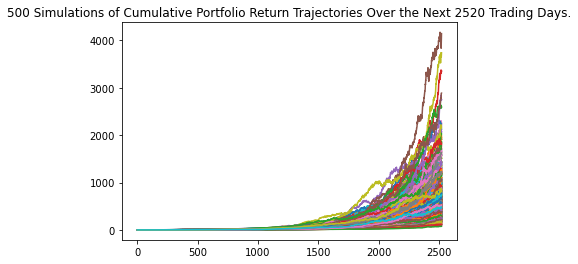

In [53]:
# Plot simulation outcomes
ten_year_plot = ten_year_MC.plot_simulation()

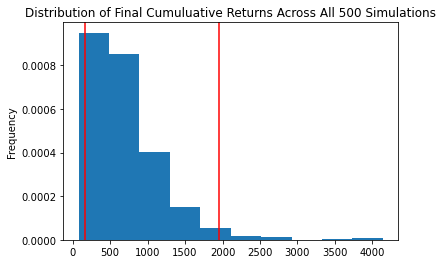

In [55]:
# Plot probability distribution and confidence intervals
dist_plot_ten = ten_year_MC.plot_distribution()

In [56]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_ten = ten_year_MC.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_ten)

count            500.000000
mean             711.749110
std              508.608582
min               77.569768
25%              365.916594
50%              574.917088
75%              909.674387
max             4140.563643
95% CI Lower     157.355844
95% CI Upper    1955.640255
Name: 2520, dtype: float64


In [57]:
# Set initial investment
initiail_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_stats_ten[8]*60000,2)
ci_upper_ten = round(summary_stats_ten[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $9441350.62 and $117338415.32
